In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
import os
os.path

# lista todos los contenidos en una carpeta
def listar_ficheros(directory_name):
    file_list = os.listdir(directory_name)
    #print(file_list)
    lista2 = []
    for file_name in file_list:
        lista2.append(os.path.join(directory_name, file_name))
    return lista2, file_list

# Elimina la primera linea de los ficheros, que es basura
def pop(file):
    with open(file, 'r+') as f: # open file in read / write mode
        firstLine = f.readline() # read the first line and throw it out
        data = f.read() # read the rest
        f.seek(0) # set the cursor to the top of the file
        f.write(data) # write the data back
        f.truncate() # set the file size to the current size
        return firstLine

def save(file_name, data):
    with open(file_name, "w") as f:
        if type(data) == list:
            for line in data:
                f.write(line)
        else:
            f.write(data)

def readfrom(file_name, line=1):
    """ comeinza a leer desde la segunda linea """
    with open(file_name, "r") as f:
        rows = f.readlines()[line:]
    return rows

## Quitar Columna Superior de PaSCO de Relleno

In [49]:
origen_rel_path = "../Datos Lab4/0930 Difraccion 1/Data cruda/" 
output_rel_path = "../Datos Lab4/0930 Difraccion 1/Data trabajada/" 
nombres_ficheros, ficheros = listar_ficheros(origen_rel_path)

readfrom(nombres_ficheros[0],0)

for idx, nomfich in enumerate(nombres_ficheros):
    data = readfrom(nomfich)
    save(output_rel_path + ficheros[idx],data)

Hacer un plot Simple

In [3]:
origen_rel_path = "../Datos Lab4/0930 Difraccion 1/Data cruda/" 
output_rel_path = "../Datos Lab4/0930 Difraccion 1/Data trabajada/" 
nombres_ficheros, ficheros = listar_ficheros(output_rel_path)

len(nombres_ficheros)
print(ficheros)

['111H.txt', '111He.txt', '112H.txt', '113H.txt', '114peeH.txt', '115AR.txt', 'Mercurio.txt', 'vapor de awa1.txt']


In [104]:

df111H = pd.read_csv(nombres_ficheros[0], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
df111He = pd.read_csv(nombres_ficheros[1], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
df112H = pd.read_csv(nombres_ficheros[2], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
df113H = pd.read_csv(nombres_ficheros[3], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
df114peeH = pd.read_csv(nombres_ficheros[4], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
df115AR = pd.read_csv(nombres_ficheros[5], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
dfMercurio = pd.read_csv(nombres_ficheros[6], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]
dfVaporAwa = pd.read_csv(nombres_ficheros[7], sep="\t")[['ángulo (rad)', 'Intensidad luminosa (%)']]

# utilize pd.read_csv(..., decimal=",") # para arreglar el problema del ruidi

angul = 'ángulo (rad)'
inten = 'Intensidad luminosa (%)'

#dataframes = [df111H, df111He, df112H, df113H, df114peeH, df115AR, dfMercurio, dfVaporAwa]


In [41]:
# Funcion para analizar
def blackbox(dataframe : pd.DataFrame, order = False, angul: str = angul, inten: str = inten):
    if(order):
        dforder = dataframe.sort_values(by=[angul])
    else:
        dforder = dataframe
    X = list(dforder[angul])
    Y = list(dforder[inten])
    return X,Y

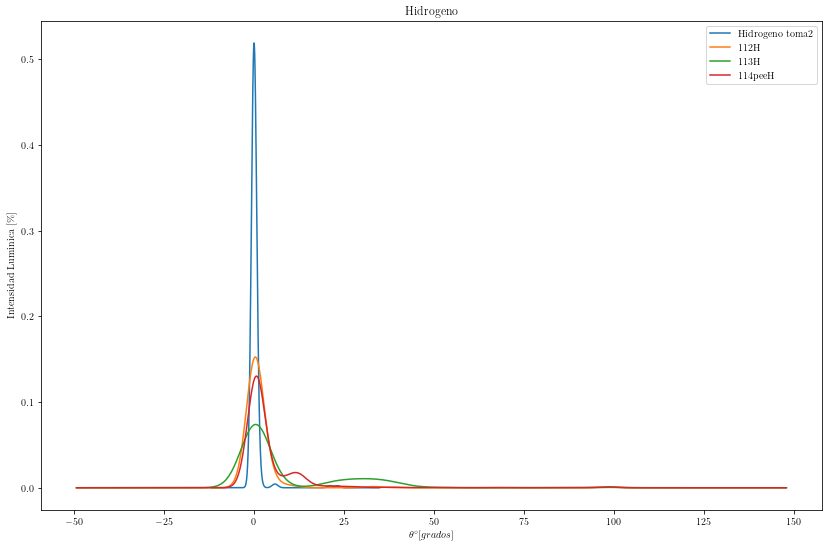

In [90]:
#dataframes = [df111H, df111He, df112H, df113H, df114peeH, df115AR, dfMercurio, dfVaporAwa]


#plt.figure(figsize=(9, 16), dpi=300) # This increases resolution
ax = df111H.plot(x=angul, y=inten, kind='density', figsize=(14,9), label='Hidrogeno toma2')# .get_figure()
df112H.plot(ax= ax, x=angul, y=inten, kind='density', label='112H')
df113H.plot(ax= ax, x=angul, y=inten, kind='density', label='113H')
df114peeH.plot(ax= ax, x=angul, y=inten, kind='density', label='114peeH')


plt.title(f'Hidrogeno')
plt.ylabel(r'Intensidad Luminica [\%]')
plt.xlabel(r'$$\theta ^\circ [grados]$$')
#plt.legend().remove() # se dejara legends para varios data
plt.show()


# fig.savefig('hidrogeno.png', transparent=True)

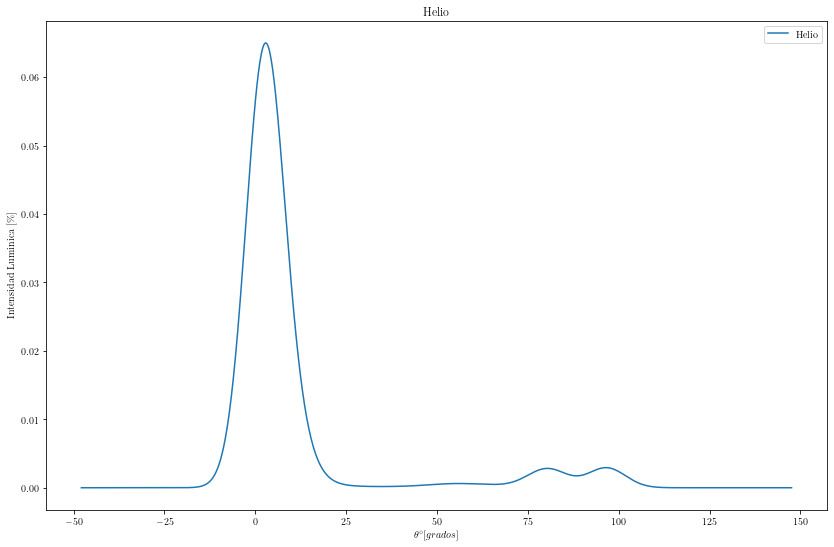

In [97]:
ax = df111He.plot(x=angul, y=inten, kind='density', figsize=(14,9), label='Helio')# .get_figure()

plt.title(f'Helio')
plt.ylabel(r'Intensidad Luminica [\%]')
plt.xlabel(r'$$\theta ^\circ [grados]$$')
#plt.legend().remove() # se dejara legends para varios data
plt.show()


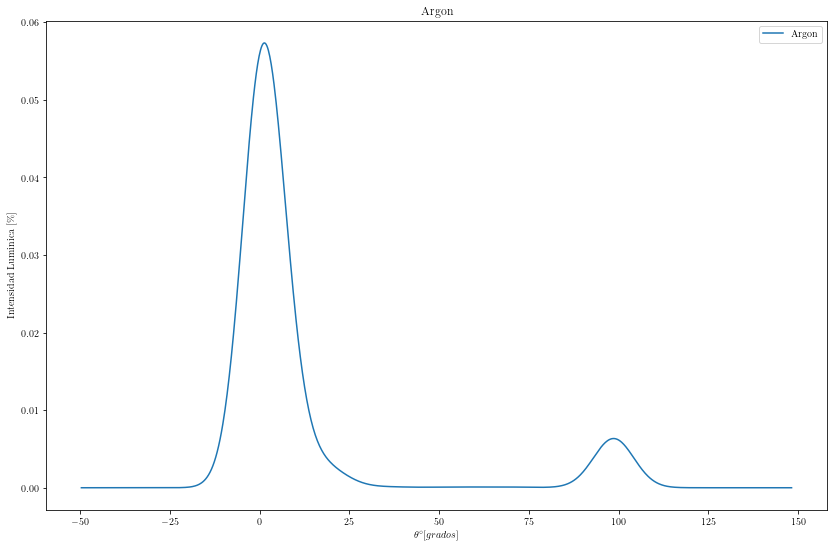

In [99]:
ax = df115AR.plot(x=angul, y=inten, kind='density', figsize=(14,9), label='Argon')# .get_figure()

plt.title(f'Argon')
plt.ylabel(r'Intensidad Luminica [\%]')
plt.xlabel(r'$$\theta ^\circ [grados]$$')
#plt.legend().remove() # se dejara legends para varios data
plt.show()

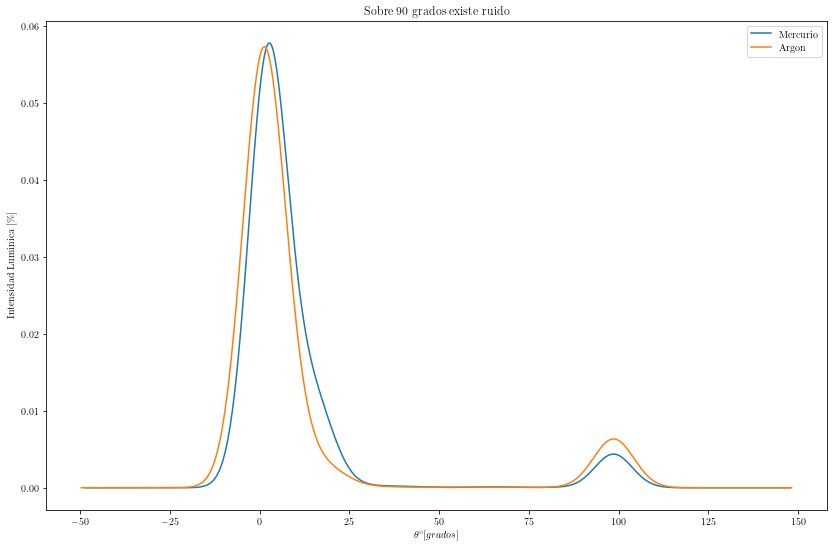

In [101]:
ax = dfMercurio.plot(x=angul, y=inten, kind='density', figsize=(14,9), label='Mercurio')# .get_figure()
df115AR.plot(ax= ax, x=angul, y=inten, kind='density', label='Argon')

plt.title(f'Sobre 90 grados existe ruido')
plt.ylabel(r'Intensidad Luminica [\%]')
plt.xlabel(r'$$\theta ^\circ [grados]$$')
#plt.legend().remove() # se dejara legends para varios data
plt.show()

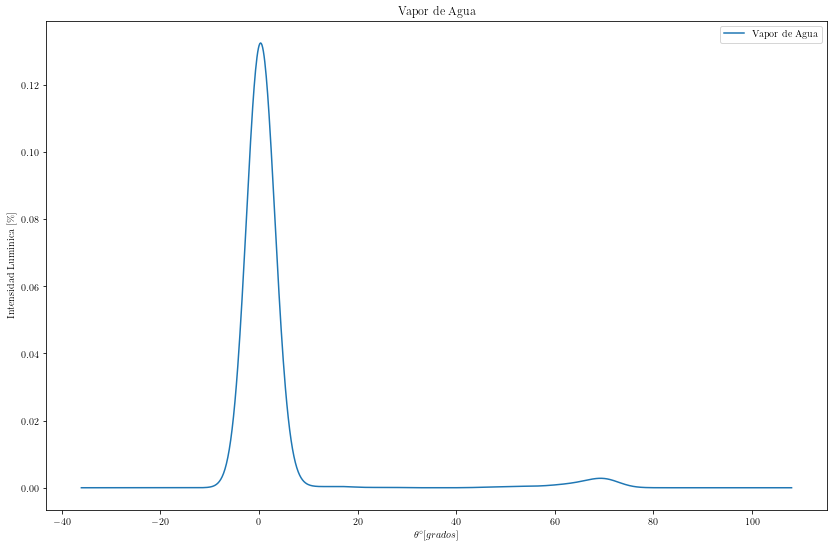

In [105]:
ax = dfVaporAwa.plot(x=angul, y=inten, kind='density', figsize=(14,9), label='Vapor de Agua')# .get_figure()


plt.title(f'Vapor de Agua')
plt.ylabel(r'Intensidad Luminica [\%]')
plt.xlabel(r'$$\theta ^\circ [grados]$$')
#plt.legend().remove() # se dejara legends para varios data
plt.show()

In [ ]:
# C:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\lab4\lab_fisica\Datos Lab4\0930 Difraccion 1\Plots